In [1]:
import ciboulette.base.ciboulettepy as Cbl
import ciboulette.sector.sectorpy as Sct
import ciboulette.utils.ephemccpy as Eph
import ciboulette.utils.exposurepy as Exp
import ciboulette.utils.planningpy as Pln

#### Initialization of objects

In [2]:
cbl = Cbl.Ciboulette()
ephcc = Eph.Ephemcc()
sct = Sct.Sector()

#### Ciboulette table tests

In [3]:
table_cbl = cbl.ciboulettetable()

In [17]:
cbl.server = '192.168.1.18:11111'

In [18]:
cbl.server

'192.168.1.18:11111'

In [4]:
table_cbl

DRV_NAME,SERVER,DEVICE,FOCAL,SITE_LAT,SITE_LONG,SITE_ELEV,INSTRUME,NAXIS1,NAXIS2,BINXY,PIXELXY,FILTER,NAME,OBSERVER,DATASET,ARCHIVES,RA,DEC,OBECT
str16,str18,int64,float64,float64,float64,int64,str10,int64,int64,int64,float64,str3,str12,str4,str13,str22,float64,float64,str4
FITS astropy 4.2,192.168.1.18:11111,0,85.0,49.5961,-0.3531,100,Atik 383L+,3326,2504,1,5.4,CLS,CIBOULETTE-A,CAM1,/home/dataset,/home/dataset/archives,0.0,90.0,INIT


#### Ephemcc class tests

The Alpaca class is used to test the movement of the telescope

In [8]:
cbl.site_lat = 40.235
ephcc.observer = cbl.ephemccgetobserver()
ephcc.observer 

'-0.3531%2040.235%20100'

In [13]:
ephcc.setndb(10)
ephcc.get()

target,epoch,ra,dec,distance,mv,phase,elongation,dracosdec,ddec,dist_dot
,,"""h:m:s""","""d:m:s""",AU,,deg,deg,arcsec / min,arcsec / min,km / s
str20,str24,str13,str13,float64,float32,float64,float64,float64,float64,float64
C/2020 M3,2021-01-01T22:00:00.00,05 13 56.9410,+45 42 39.772,0.682582,13.690,17.72,150.09,-0.0012796,0.65552,20.9631994
C/2020 M3,2021-01-02T22:00:00.00,05 14 2.9135,+45 57 51.227,0.694787742,13.770,18.07,149.28,0.01647,0.61633,21.2594628
C/2020 M3,2021-01-03T22:00:00.00,05 14 11.2878,+46 12 8.070,0.707161595,13.860,18.4,148.48,0.034182,0.57874,21.5525222
C/2020 M3,2021-01-04T22:00:00.00,05 14 22.0767,+46 25 32.563,0.719701808,13.950,18.73,147.68,0.051845,0.54272,21.8425839
C/2020 M3,2021-01-05T22:00:00.00,05 14 35.2899,+46 38 6.894,0.732406736,14.040,19.04,146.9,0.069447,0.5082,22.1298126
C/2020 M3,2021-01-06T22:00:00.00,05 14 50.9343,+46 49 53.177,0.745274816,14.130,19.35,146.11,0.08698,0.47514,22.4143259
C/2020 M3,2021-01-07T22:00:00.00,05 15 9.0144,+47 00 53.458,0.758304536,14.210,19.64,145.34,0.10444,0.4435,22.6961904
C/2020 M3,2021-01-08T22:00:00.00,05 15 29.5319,+47 11 9.715,0.771494405,14.300,19.92,144.57,0.12181,0.41322,22.9754197


In [14]:
from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astropy.io.votable import parse_single_table


table = parse_single_table(ephcc.filename).to_table()
c = SkyCoord(table['ra'], table['dec'], unit='deg', frame='icrs')
c.ra.degree*15,c.dec.degree

(array([78.48725417, 78.51213958, 78.5470325 , 78.59198625, 78.64704125,
        78.71222625, 78.78756   , 78.87304958, 78.96869083, 79.07446625]),
 array([45.71104778, 45.96422972, 46.20224167, 46.42571194, 46.63524833,
        46.83143806, 47.01484944, 47.18603194, 47.34551722, 47.49381972]))

In [15]:
from alpaca import Telescope

In [19]:
# Initialisation Telescope
cbl.device = 2
telescope = Telescope(cbl.server, cbl.device)
telescope.sitelatitude(cbl.site_lat)
telescope.sitelongitude(cbl.site_long)
telescope.unpark()
telescope.tracking(True)

In [21]:
RA = c.ra.deg[0]
DEC = c.dec.deg[0]

# Déplacement
telescope.slewtocoordinates(RA,DEC)

#### Check sofware tests

In [7]:
sectortable = sct.readarchives(cbl.archive_table)

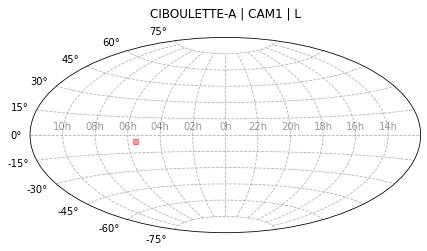

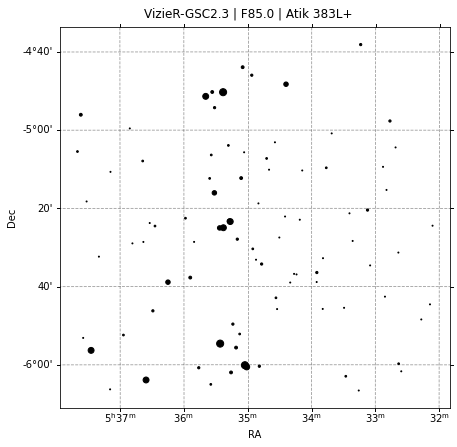

In [11]:
cbl.ra = 5.58
cbl.dec = -5.36
cbl.projections(sectortable)
cbl.starmap()

#### Planning tests

In [3]:
pln = Pln.Planning('1Yc-QxFr9veMeGjqvedRMrcEDL2GRyTS_','planning.csv')

In [4]:
tablepln = pln.get()

In [5]:
tablepln

name,ra,dec,exposure,number,binning,filter,datatype,desciption
str7,float64,float64,int64,int64,int64,str3,str9,str19
SECTOR1,5.3,73.9,60,1,1,CLS,intensity,none
SECTOR1,5.3,70.9,60,2,1,CLS,intensity,none
SECTOR1,5.3,67.9,60,3,1,L,black,test black sequence
SECTOR1,5.3,64.9,60,20210001,1,R,intensity,none


In [6]:
tablepln[0:3]

name,ra,dec,exposure,number,binning,filter,datatype,desciption
str7,float64,float64,int64,int64,int64,str3,str9,str19
SECTOR1,5.3,73.9,60,1,1,CLS,intensity,none
SECTOR1,5.3,70.9,60,2,1,CLS,intensity,none
SECTOR1,5.3,67.9,60,3,1,L,black,test black sequence


In [7]:
exp = Exp.Exposure()

In [8]:
plan = tablepln[3]
exp.setexptime(plan['exposure'])
exp.setnumber(plan['number'])

True

In [9]:
exp.getexptime(),exp.getnumber()

(60, 20210001)